KEYWORD EXTRACTION

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.parse.corenlp import transform

In [12]:
df = pd.read_csv("papers.csv")
df.head(10)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
5,1002,1994,Using a neural net to instantiate a deformable...,NaN,1002-using-a-neural-net-to-instantiate-a-defor...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
6,1003,1994,Plasticity-Mediated Competitive Learning,NaN,1003-plasticity-mediated-competitive-learning.pdf,Abstract Missing,Plasticity-Mediated Competitive Learning\n\nTe...
7,1004,1994,ICEG Morphology Classification using an Analog...,NaN,1004-iceg-morphology-classification-using-an-a...,Abstract Missing,ICEG Morphology Classification using an\nAnalo...
8,1005,1994,Real-Time Control of a Tokamak Plasma Using Ne...,NaN,1005-real-time-control-of-a-tokamak-plasma-usi...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1006,1994,Pulsestream Synapses with Non-Volatile Analogu...,NaN,1006-pulsestream-synapses-with-non-volatile-an...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...


In [4]:
df.shape

(7241, 7)

In [6]:
df.isnull().sum()

id               0
year             0
title            0
event_type    4819
pdf_name         0
abstract         0
paper_text       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7241 non-null   int64 
 1   year        7241 non-null   int64 
 2   title       7241 non-null   object
 3   event_type  2422 non-null   object
 4   pdf_name    7241 non-null   object
 5   abstract    7241 non-null   object
 6   paper_text  7241 non-null   object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB


In [8]:
df.describe()

,id,year
count,7241.000000,7241.000000
mean,3655.912167,2006.439718
std,2098.435219,8.759919
min,1.000000,1987.000000
25%,1849.000000,2000.000000
50%,3659.000000,2009.000000
75%,5473.000000,2014.000000
max,7284.000000,2017.000000


In [9]:
df['year'].value_counts()

year
2017    679
2016    569
2014    411
2015    403
2012    368
2013    360
2011    306
2010    292
2009    262
2008    250
2007    217
2005    207
2002    207
2004    207
2006    204
2003    198
2001    197
1993    158
1996    152
1995    152
2000    152
1998    151
1999    150
1997    150
1991    144
1990    143
1994    140
1992    127
1989    101
1988     94
1987     90
Name: count, dtype: int64

<Axes: xlabel='year'>

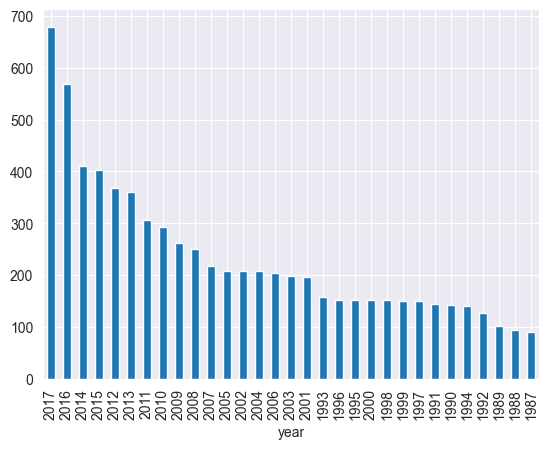

In [10]:
df['year'].value_counts().plot(kind='bar')

PREPROCESSING OF DATA

In [13]:
df['paper_text'][0]

'767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABASE\nAND ITS APPLICATIONS\nHisashi Suzuki and Suguru Arimoto\nOsaka University, Toyonaka, Osaka 560, Japan\nABSTRACT\nAn efficient method of self-organizing associative databases is proposed together with\napplications to robot eyesight systems. The proposed databases can associate any input\nwith some output. In the first half part of discussion, an algorithm of self-organization is\nproposed. From an aspect of hardware, it produces a new style of neural network. In the\nlatter half part, an applicability to handwritten letter recognition and that to an autonomous\nmobile robot system are demonstrated.\n\nINTRODUCTION\nLet a mapping f : X -+ Y be given. Here, X is a finite or infinite set, and Y is another\nfinite or infinite set. A learning machine observes any set of pairs (x, y) sampled randomly\nfrom X x Y. (X x Y means the Cartesian product of X and Y.) And, it computes some\nestimate j : X -+ Y of f to make small, the estimation erro

cleaning of data text preprocessing

In [3]:
import re
import string
import nltk
import math
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [4]:
stop_words =set(stopwords.words('english'))

In [24]:
stop_words = set(stopwords.words('english'))
new_words = [
    "fig", "figure", "image", "sample", "using", "show", "result", "large", "also",
    "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten",
    "item", "type", "document", "content", "style", "word", "paper", "section", "data",
    "number", "value", "use", "used", "based", "method", "approach", "model", "system",
    "present", "shown", "proposed", "example", "provide", "provide", "various", "different",
    "such", "several", "like", "well", "known", "common", "may", "might", "could",
    "would", "among", "within", "between", "across", "respectively", "corresponding",
    "obtain", "obtained", "find", "found", "high", "low", "important", "significant",
    "paper", "article", "analysis", "study", "experiment", "research", "resulting",
    "highly", "generally", "used", "shown", "make", "made", "taken", "given",
    "used", "example", "shown", "include", "including", "important", "such",
    "specific", "general", "level", "demonstrate", "evaluate", "based", "due", "because",
    "work", "previous", "recent", "compared", "comparison", "existing", "new", "novel",
    "paper", "current", "section", "table", "figure", "results", "experiments", "values",
    "state", "recent", "existing", "following", "related", "literature", "case", "cases"
]

stop_words = stop_words.union(set(new_words))
print(stop_words)

{"mustn't", 'didn', 'having', 'only', 'have', 'needn', 'yourself', 'themselves', 'two', "he'd", "they've", 'haven', 'across', 'evaluate', 'than', 'doesn', 'of', 'i', 'in', 'during', 'very', 'before', 'y', 'herself', 'obtained', 'highly', 'show', 'ma', 'shouldn', "shan't", 'value', 'it', 'demonstrate', 'experiments', "doesn't", 'present', 'ourselves', 'him', 'known', 'fig', 'up', 'important', 'am', 'off', 'you', 'own', 'to', 'resulting', 'four', 'the', 'its', 'them', 'your', 'corresponding', 'more', 'where', 'ain', 'will', 'low', "we've", 'such', 'novel', 'general', 'both', 'mustn', 'not', "they'll", 'here', "it's", 'all', 'so', 'seven', 't', 'approach', 'existing', 'include', 'd', 'may', 'over', 'weren', 'ten', 'made', "she'd", 'after', 'including', 'state', 'any', 'theirs', 'current', 'same', 'a', 'again', "needn't", 'several', 'what', "won't", 'well', 'couldn', 'figure', 'could', "couldn't", 'hadn', 'yourselves', 'for', 'large', "we'll", 'respectively', "hasn't", 'or', 'five', 'be', 

In [15]:
def preprocessing(text):
    txt = text.lower()
    txt = re.sub(r'<.*?>', ' ', txt)        # Remove HTML tags
    txt = re.sub(r'[^a-zA-Z]', ' ', txt)    # Keep only letters
    txt = re.sub(r'\s+', ' ', txt)          # Normalize whitespace

    # Manual tokenization (split by space)
    txt = txt.strip().split(" ")

    # Remove stopwords and short words
    txt = [word for word in txt if word not in stop_words and len(word) > 3]

    # Stemming
    stemmer = PorterStemmer()
    txt = [stemmer.stem(word) for word in txt]

    return txt

In [7]:
preprocessing("'767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABASE\nAND ITS APPLICATIONS\nHisashi Suzuki and Suguru Arimoto\nOsaka University, Toyonaka, Osaka 560, Japan\nABSTRACT\nAn efficient method of self-organizing associative databases is proposed together with\napplications to robot eyesight systems. The proposed databases can associate any input\nwith some output. In the first half part of discussion, an ")

['self',
 'organ',
 'associ',
 'databas',
 'applic',
 'hisashi',
 'suzuki',
 'suguru',
 'arimoto',
 'osaka',
 'univers',
 'toyonaka',
 'osaka',
 'japan',
 'abstract',
 'effici',
 'method',
 'self',
 'organ',
 'associ',
 'databas',
 'propos',
 'togeth',
 'applic',
 'robot',
 'eyesight',
 'system',
 'propos',
 'databas',
 'associ',
 'input',
 'output',
 'first',
 'half',
 'part',
 'discuss']

In [16]:
docs = df['paper_text'].apply(lambda x: ' '.join(preprocessing(x)))


In [17]:
docs

0       self organ associ databas applic hisashi suzuk...
1       mean field theori layer visual cortex applic a...
2       store covari associ long term potenti depress ...
3       bayesian queri construct neural network model ...
4       neural network ensembl cross valid activ learn...
                              ...                        
7236    singl transistor learn synaps paul hasler chri...
7237    bia varianc combin least squar estim ronni mei...
7238    real time cluster cmo neural engin serrano got...
7239    learn direct global motion class psychophys mo...
7240    correl interpol network real time express anal...
Name: paper_text, Length: 7241, dtype: object

COUNT VECTORIZER

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, max_features=5000, ngram_range=(1, 2))
wordcount = cv.fit_transform(docs)


TF_IDF TRANSFORMER

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer(smooth_idf=True,use_idf=True)#smooth_idf will prevent / by 0, use_idf long words should be given highest value
tfidf.fit(wordcount)

TfidfTransformer()

KEYWORDS

In [28]:
feature_name=(cv.get_feature_names_out())

In [29]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    #taking top items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    for idx, score in sorted_items:
        fname = feature_names[idx]
        score_vals.append(round(score,3))
        feature_vals.append(feature_names[idx])

    #create a tuples of features,score
    results = {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]] = score_vals[idx]  # Fix: Changed '==' to '='
    return results


# get feature names
feature_names=cv.get_feature_names_out()

def get_keywords(idx, docs):

    #generate tf-idf for the given document
    tf_idf_vector=tfidf.transform(cv.transform([docs[idx]]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only the top n; n here is 10
    keywords=extract_topn_from_vector(feature_names,sorted_items,10)

    return keywords


def print_results(idx,keywords, df):
    # now print the results
    print("\n=====Title=====")
    print(df['title'][idx])
    print("\n=====Abstract=====")
    print(df['abstract'][idx])
    print("\n===Keywords===")
    for k in keywords:
        print(k,keywords[k])
idx=4995
keywords=get_keywords(idx, docs)
print_results(idx,keywords, df)


=====Title=====
Low-Rank Time-Frequency Synthesis

=====Abstract=====
Many single-channel signal decomposition techniques rely on a low-rank factorization of a time-frequency transform. In particular, nonnegative matrix factorization (NMF) of the spectrogram -- the (power) magnitude of the short-time Fourier transform (STFT) -- has been considered in many audio applications. In this setting, NMF with the Itakura-Saito divergence was shown to underly a generative Gaussian composite model (GCM) of the STFT, a step forward from more empirical approaches based on ad-hoc transform and divergence specifications. Still, the GCM is not yet a generative model of the raw signal itself, but only of its STFT. The work presented in this paper fills in this ultimate gap by proposing a novel signal synthesis model with low-rank time-frequency structure. In particular, our new approach opens doors to multi-resolution representations, that were not possible in the traditional NMF setting. We describe 

In [66]:
import pickle
pickle.dump(cv, open('counter_vector.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(feature_names, open('feature_names.pkl', 'wb'))
